In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols = 'user_id item_id rating timestamp'.split()

In [3]:
df = pd.read_csv('u.data', sep = '\t', names = cols)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df['user_id'].nunique()

943

In [4]:
cols_movies = ['item_id', 'title']+[str(i) for i in range(24)]
movie_titles = pd.read_csv('u.item', sep = '|', encoding = 'latin-1', names = cols_movies)
movie_titles.head()

,item_id,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,NaN,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,NaN


In [5]:
movie_title = movie_titles[['item_id', 'title']]
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
movie_titles.shape

(1682, 26)

In [8]:
df.shape

(100000, 4)

In [9]:
data = pd.merge(df, movie_title, on = 'item_id')
data.sample(5)

,user_id,item_id,rating,timestamp,title
65620,130,233,4,875801750,Under Siege (1992)
68325,197,511,5,891409839,Lawrence of Arabia (1962)
65331,627,9,4,879530014,Dead Man Walking (1995)
76812,13,411,2,882141924,"Nutty Professor, The (1996)"
54456,313,142,3,891030261,Bedknobs and Broomsticks (1971)


In [10]:
data['title'].value_counts().head()

Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: title, dtype: int64

In [11]:
df['rating'].mean()

3.52986

In [12]:
for i in data['title'].unique():
    print(i, data['rating'][data['title']==i].mean(), sep = '\t\t')

Kolya (1996)		3.9914529914529915
L.A. Confidential (1997)		4.161616161616162
Heavyweights (1994)		2.1538461538461537
Legends of the Fall (1994)		3.45679012345679
Jackie Brown (1997)		3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)		4.252577319587629
Hunt for Red October, The (1990)		3.8634361233480177
Jungle Book, The (1994)		3.5647058823529414
Grease (1978)		3.347058823529412
Remains of the Day, The (1993)		3.94
Men in Black (1997)		3.745874587458746
Romy and Michele's High School Reunion (1997)		3.061224489795918
Star Trek: First Contact (1996)		3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995)		2.8947368421052633
Batman Forever (1995)		2.6666666666666665
Only You (1994)		3.1538461538461537
Age of Innocence, The (1993)		3.3846153846153846
Sabrina (1995)		3.5
Just Cause (1995)		3.142857142857143
Endless Summer 2, The (1994)		2.5
Man Without a Face, The (1993)		3.5441176470588234
Sabrina (1954)		3.796875
Die Hard (198

In [13]:
data.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [14]:
rating = pd.DataFrame(data.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [15]:
rating['count'] = data['title'].value_counts()
rating.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [16]:
(rating['count']<10).sum()

520

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency-->')

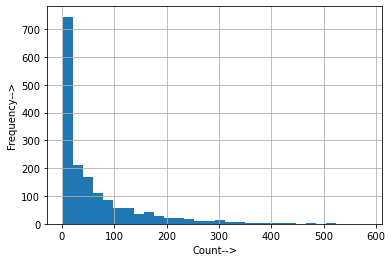

In [19]:
rating['count'].hist(bins = 30)
plt.xlabel('Count-->')
plt.ylabel('Frequency-->')

In [20]:
pivot_df = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
pivot_df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [21]:
rating.sort_values('count', ascending = False).head()

,rating,count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [22]:
sw_ratings = pivot_df['Star Wars (1977)']
sw_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [23]:
similarity_sw = pivot_df.corrwith(sw_ratings)
similarity_sw

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [24]:
corr_df = pd.DataFrame(similarity_sw, columns = ['Correlation'])
corr_df.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [25]:
corr_df.dropna(inplace = True)

In [27]:
corr_df.sort_values('Correlation')

,Correlation
title,
Frankie Starlight (1995),-1.0
Roseanna's Grave (For Roseanna) (1997),-1.0
Two Deaths (1995),-1.0
I Like It Like That (1994),-1.0
Theodore Rex (1995),-1.0
...,...
Cosi (1996),1.0
Commandments (1997),1.0
Hollow Reed (1996),1.0


In [28]:
corr_df = corr_df.join(rating['count'])
corr_df.head()

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [29]:
corr_df.sort_values(by = 'Correlation', ascending = False).head()

,Correlation,count
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5


In [30]:
ter_ratings = pivot_df['Terminator 2: Judgment Day (1991)']
similarity_ter = pivot_df.corrwith(ter_ratings)
corr_df_ter = pd.DataFrame(similarity_ter, columns = ['Correlation'])
corr_df_ter.dropna(inplace=True)
corr_df_ter = corr_df_ter.join(rating['count'])
corr_df_ter[corr_df_ter['count']>200].sort_values(by='Correlation',ascending=False).head(3)

,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
True Lies (1994),0.516728,208


In [31]:
corr_df_ter[(corr_df_ter['count']>200)&(corr_df_ter['Correlation']>0.55)].sort_values(by='Correlation',ascending=False)

,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
